In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
train=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/fruits_vegetable_dataset/train",
      labels='inferred',
      label_mode='categorical',
      class_names=None,
      color_mode='rgb',
      batch_size=32,
      image_size=(64,64),
      shuffle=True,
      seed=None,
      validation_split=None,
      subset=None,
      interpolation='bilinear',
      follow_links=False,
      crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [ ]:
validation=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/fruits_vegetable_dataset/validation",
      labels='inferred',
      label_mode='categorical',
      class_names=None,
      color_mode='rgb',
      batch_size=32,
      image_size=(64,64),
      shuffle=True,
      seed=None,
      validation_split=None,
      subset=None,
      interpolation='bilinear',
      follow_links=False,
      crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [ ]:
cnn=tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
#cnn.add(tf.keras.layers.Dropout(0.5)) #avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))#output layer


COMPILING AND TRAINING

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                 

In [58]:
training_history=cnn.fit(x=train, validation_data=validation,epochs=32)

Epoch 1/32
98/98 [==============================] - 635s 6s/step - loss: 6.5392 - accuracy: 0.0327 - val_loss: 3.4898 - val_accuracy: 0.0570
Epoch 2/32
98/98 [==============================] - 151s 1s/step - loss: 3.5115 - accuracy: 0.0607 - val_loss: 3.5428 - val_accuracy: 0.0798
Epoch 3/32
98/98 [==============================] - 159s 2s/step - loss: 3.4759 - accuracy: 0.0729 - val_loss: 3.2017 - val_accuracy: 0.1852
Epoch 4/32
98/98 [==============================] - 147s 1s/step - loss: 3.3745 - accuracy: 0.0912 - val_loss: 3.0809 - val_accuracy: 0.2365
Epoch 5/32
98/98 [==============================] - 138s 1s/step - loss: 3.1973 - accuracy: 0.1284 - val_loss: 2.6285 - val_accuracy: 0.3504
Epoch 6/32
98/98 [==============================] - 147s 1s/step - loss: 2.9780 - accuracy: 0.1862 - val_loss: 2.1820 - val_accuracy: 0.4444
Epoch 7/32
98/98 [==============================] - 148s 1s/step - loss: 2.8021 - accuracy: 0.2308 - val_loss: 2.1988 - val_accuracy: 0.4672
Epoch 8/32
98

In [59]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
training_history.history

{'loss': [6.539165496826172,
  3.511521816253662,
  3.475856065750122,
  3.3745434284210205,
  3.1973235607147217,
  2.977991819381714,
  2.802093267440796,
  2.5806970596313477,
  2.3358404636383057,
  2.035939931869507,
  1.8205773830413818,
  1.6911543607711792,
  1.5150805711746216,
  1.345969796180725,
  1.252395510673523,
  1.1278597116470337,
  1.0317498445510864,
  1.0480775833129883,
  0.9874415993690491,
  1.0086188316345215,
  1.006514310836792,
  0.8421971201896667,
  0.7614195346832275,
  0.8297734260559082,
  0.6847780346870422,
  0.658394992351532,
  0.5732313990592957,
  0.5478671193122864,
  0.5033605694770813,
  0.49217939376831055,
  0.4423677325248718,
  0.4229414463043213],
 'accuracy': [0.03274478390812874,
  0.06067415699362755,
  0.07287319749593735,
  0.0911717489361763,
  0.1284109205007553,
  0.18619582056999207,
  0.23081861436367035,
  0.27736756205558777,
  0.3431781828403473,
  0.43402889370918274,
  0.4966292083263397,
  0.5223113894462585,
  0.567576229

In [61]:
#record history
import json
with open('training_hist.json','w')as f:
  json.dump(training_history.history,f)

In [63]:
import pickle

# Assuming history is the object containing training history
with open('training_history.pkl', 'wb') as file:
    pickle.dump(training_history.history, file)

In [65]:
import pandas as pd

# Assuming history is the object containing training history
history_df = pd.DataFrame(training_history.history)
history_df.to_csv('training_history.csv', index=False)

In [67]:
#loading the training history from the json file
import json
with open('/content/training_hist.json', 'r') as file:
    loaded_history = json.load(file)

In [68]:
with open('/content/training_hist.json', 'r') as file:
    file_contents = file.read()
    print(file_contents)

{"loss": [6.539165496826172, 3.511521816253662, 3.475856065750122, 3.3745434284210205, 3.1973235607147217, 2.977991819381714, 2.802093267440796, 2.5806970596313477, 2.3358404636383057, 2.035939931869507, 1.8205773830413818, 1.6911543607711792, 1.5150805711746216, 1.345969796180725, 1.252395510673523, 1.1278597116470337, 1.0317498445510864, 1.0480775833129883, 0.9874415993690491, 1.0086188316345215, 1.006514310836792, 0.8421971201896667, 0.7614195346832275, 0.8297734260559082, 0.6847780346870422, 0.658394992351532, 0.5732313990592957, 0.5478671193122864, 0.5033605694770813, 0.49217939376831055, 0.4423677325248718, 0.4229414463043213], "accuracy": [0.03274478390812874, 0.06067415699362755, 0.07287319749593735, 0.0911717489361763, 0.1284109205007553, 0.18619582056999207, 0.23081861436367035, 0.27736756205558777, 0.3431781828403473, 0.43402889370918274, 0.4966292083263397, 0.5223113894462585, 0.5675762295722961, 0.6205457448959351, 0.644622802734375, 0.6825039982795715, 0.7011235952377319,

In [73]:
training_hist = dict(loaded_history)
print(training_hist.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
#final accuracy of model
print("validation set Accuracy :{} %".format(training_history.history['val_accuracy'][-1]* 100))

validation set Accuracy :92.87749528884888 %


VISUALIZATION

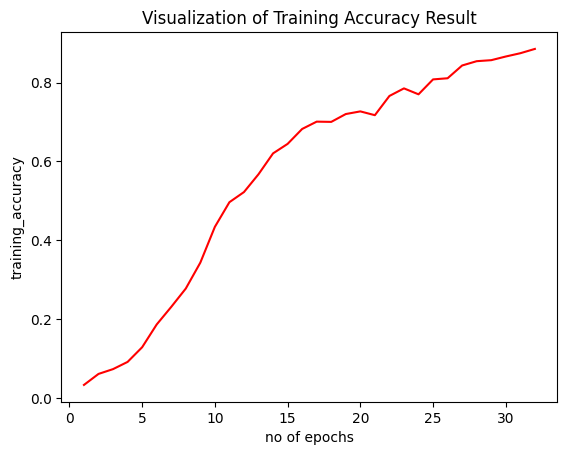

In [76]:
epochs=[i for i in range(1,33)]
plt.plot(epochs,training_hist['accuracy'],color='red')
plt.xlabel('no of epochs')
plt.ylabel('training_accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

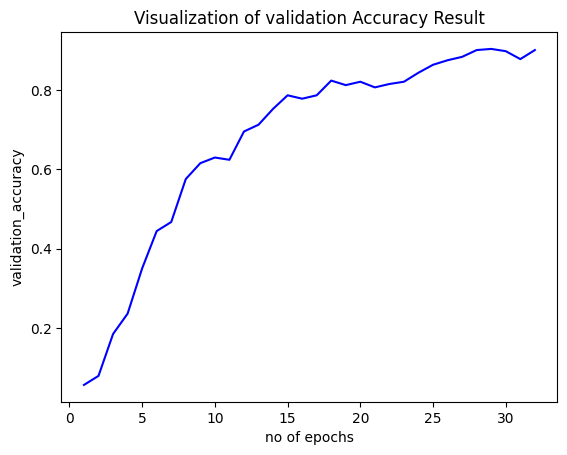

In [78]:
#validation accuracy
plt.plot(epochs,training_hist['val_accuracy'],color='blue')
plt.xlabel('no of epochs')
plt.ylabel('validation_accuracy')
plt.title('Visualization of validation Accuracy Result')
plt.show()


# loading MODEL



In [79]:
cnn=tf.keras.models.load_model('/content/trained_model.h5')

In [ ]:
import json
with open('/content/drive/MyDrive/fruits_vegetable_dataset/training_hist.json', 'r') as file:
    loaded_history = json.load(file)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

**TESTING MODEL**

In [80]:
test=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/fruits_vegetable_dataset/test",
      labels='inferred',
      label_mode='categorical',
      class_names=None,
      color_mode='rgb',
      batch_size=32,
      image_size=(64,64),
      shuffle=True,
      seed=None,
      validation_split=None,
      subset=None,
      interpolation='bilinear',
      follow_links=False,
      crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


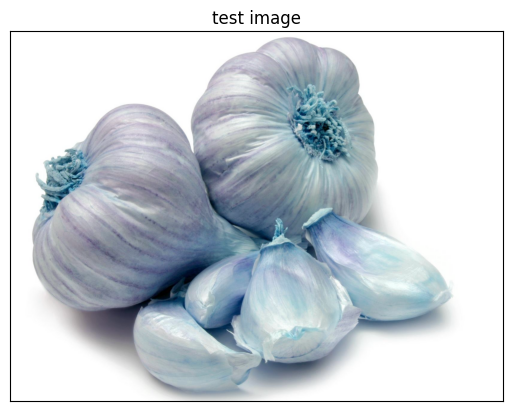

In [87]:
import cv2
image_path="/content/drive/MyDrive/fruits_vegetable_dataset/test/garlic/Image_10.jpg"
img=cv2.imread(image_path)
plt.imshow(img)
plt.title('test image')
plt.xticks([])
plt.yticks([])
plt.show()

**PERFORMING PREDICION**

In [88]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])  #convert single image to batch
prediction=cnn.predict(input_arr)

1/1 [==============================] - 0s 35ms/step


In [89]:
print(prediction[0])

[1.3985449e-05 3.3675406e-08 4.1973377e-05 7.6694032e-06 3.2853285e-09
 2.6388882e-06 4.0773574e-07 4.5936112e-08 7.2897064e-06 2.7241879e-06
 1.9637453e-07 8.9805224e-07 9.9933356e-01 7.3460320e-08 1.0636104e-04
 3.7221454e-10 3.7119331e-04 2.4383706e-05 3.6133065e-11 2.1188760e-06
 7.1298177e-06 4.3461878e-06 3.8310097e-09 5.1764404e-05 9.8228758e-09
 2.0987156e-09 4.3629962e-07 2.5967797e-06 5.8286656e-07 2.9864618e-06
 2.3887723e-12 2.3512428e-06 3.8816120e-06 1.7160629e-07 1.8672080e-07
 7.8725334e-06]


In [90]:
# test.class_names
result=np.where(prediction[0]==max(prediction[0]))
final_result=result[0][0]
print(final_result)

12


In [91]:
print("it is a {}".format(test.class_names[final_result]))

it is a garlic


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>